In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc

rc('text', usetex=False)
rc('font', family='serif', size=20)
rc('figure', figsize=(12,8))
rc('axes',linewidth=2)

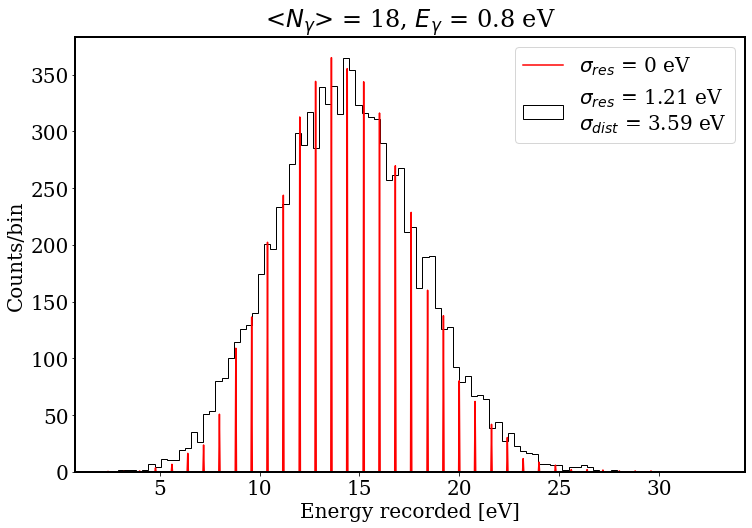

In [7]:
lamb = 18      #numero medio fotoni
sigma = 0.02/0.0132*0.8   #risoluzione energetica rivelatore (NO FWHM) [eV]
nev = 10000    #numero di eventi
E_gamma = 0.8   #energia singolo fotone

bins = 100

X1 = np.random.poisson(lamb,nev)
X1 = X1*E_gamma
X2 = np.random.normal(loc=0,scale=sigma,size=nev)

name = '$\sigma_{res}$ = '+str(np.round(sigma, 2)) + ' eV' + '\n'+ '$\sigma_{dist}$ = '+str(np.round(np.std(X1+X2), 2))+ ' eV'
name2 = '$\sigma_{res}$ = '+str(0) + ' eV' 

x_min = np.min(X1+X2)
x_max = np.max(X1+X2)

plt.hist(X1+X2,bins=bins,histtype='step',range=(x_min,x_max),color='k',label=name)
en , _ = np.histogram(X1+X2,bins=bins,range=(x_min,x_max))

entries, bin_pos =np.histogram(X1,bins=bins*10,range=(x_min,x_max))
step = (bin_pos[1]-bin_pos[0])/2
bin_pos = np.linspace(bin_pos[0]+step,bin_pos[-1]-step,bins*10)
conv = np.max(entries)/np.max(en)
plt.plot(bin_pos,entries/conv,c='r',label=name2)

plt.legend()
plt.title('<$N_{\gamma}$> = '+str(lamb)+ ', $E_{\gamma}$ = '+str(E_gamma)+ ' eV')
plt.xlabel('Energy recorded [eV]')
plt.ylabel('Counts/bin')
plt.savefig('fig1.png')
plt.show()

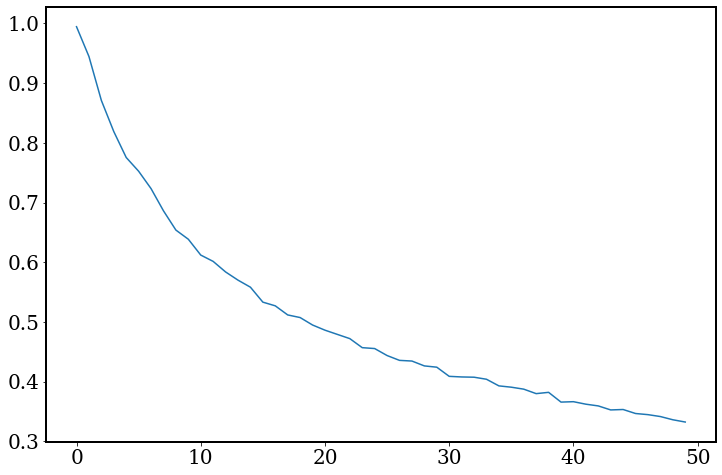

In [26]:
#simg_res/sigma_dis vs #ph
lamb = 6      #numero medio fotoni
sigma = 2   #risoluzione energetica rivelatore (NO FWHM) [UA]
nev = 10000    #numero di eventi
E_gamma = 0.8

x = []
y = []
plt.figure()
for lamb in range(0,50, 1):
    X1 = np.random.poisson(lamb,nev)
    X1 = X1*E_gamma
    X2 = np.random.normal(loc=0,scale=sigma,size=nev)
    sigma_dist = np.std(X1+X2)
    x.append(lamb)
    y.append(sigma/sigma_dist)

plt.plot(x, y)

plt.show()